# Analyse tumour growth under Erlotinib treatment

## 1. Import data

In [2]:
import os
import pandas as pd

# Import data
path = os.getcwd()
data_raw = pd.read_csv(path + '/data/PKPD_ErloAndGefi_LXF.csv', sep=';')

# Filter relevant information
data = data_raw[['#ID', 'TIME', 'Y', 'DOSE GROUP', 'DOSE', 'BW']]

# Convert TIME and Y to numeric values (currently strings)
data['TIME'] = pd.to_numeric(data['TIME'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Filter for Erlotinib data
data = data[data_raw['DRUG'] == 1]

# Sort TIME values (for plotting convenience)
data.sort_values(by='TIME', inplace=True)

# Show data
data

,#ID,TIME,Y,DOSE GROUP,DOSE,BW
21,6,0,68.7500,100.00,.,24.2
170,34,0,165.2920,25.00,.,27.7
184,38,0,39.5035,6.25,.,27.2
269,52,0,205.3500,25.00,.,24.5
309,67,0,186.2000,100.00,.,28.5
...,...,...,...,...,...,...
608,128,30,445.5000,100.00,.,30.9
549,122,30,742.5625,25.00,.,22.1
192,38,30,1002.4720,6.25,.,30.2
629,129,30,760.3840,25.00,.,30.0


### 1.1 Sort data into dose groups

In [3]:
# Get dose groups
groups = data['DOSE GROUP'].unique()

# Sort into groups
data_one = data[data['DOSE GROUP'] == groups[0]]
data_two = data[data['DOSE GROUP'] == groups[1]]
data_three = data[data['DOSE GROUP'] == groups[2]]

## 2. Visualise observed tumour growth

### 2.1 Under Erlotinib treatment high dose

Mice were administered with a daily oral dose of 100 mg/kg/day from day 0 to 5 and 11 to 13

100.0


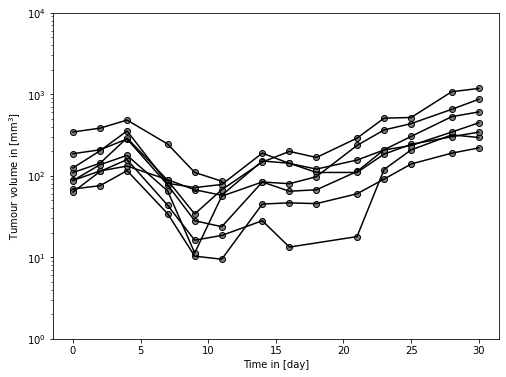

In [4]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[0])

# Get unique animal IDs
ids = data_one['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_one['#ID'] == i
    time = data_one[mask]['TIME']
    volume = data_one[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.semilogy(time, volume, color='black')
    plt.scatter(time, volume, color='gray', edgecolor='black')

# Set y lim
plt.ylim([1E0, 1E4])

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel(r'Tumour volume in [mm$^3$]')

plt.show()

### 2.2 Under Erlotinib treatment medium dose

From day 0 to 13 a daily dose of 25 mg/kg/day was orally administered.

25.0


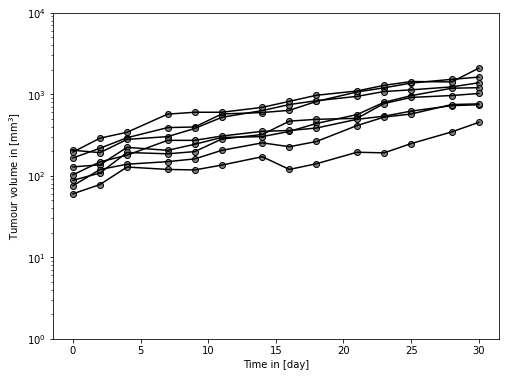

In [5]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[1])

# Get unique animal IDs
ids = data_two['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_two['#ID'] == i
    time = data_two[mask]['TIME']
    volume = data_two[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.semilogy(time, volume, color='black')
    plt.scatter(time, volume, color='gray', edgecolor='black')

# Set y lim
plt.ylim([1E0, 1E4])

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel(r'Tumour volume in [mm$^3$]')

plt.show()

### 2.3 Under Erlotinib treatment low dose

From day 0 to 13 a daily dose of 6.25 mg/kg/day was orally administered.

6.25


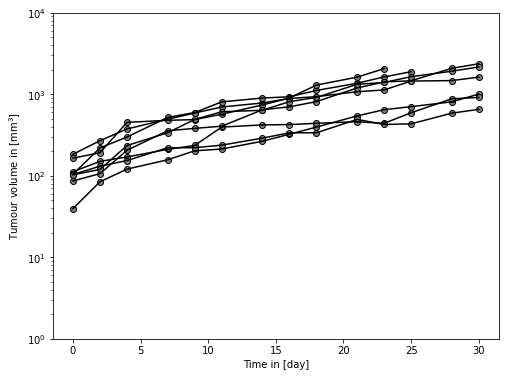

In [8]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[2])

# Get unique animal IDs
ids = data_three['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_three['#ID'] == i
    time = data_three[mask]['TIME']
    volume = data_three[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.semilogy(time, volume, color='black')
    plt.scatter(time, volume, color='gray', edgecolor='black')

# Set y lim
plt.ylim([1E0, 1E4])

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel(r'Tumour volume in [mm$^3$]')

plt.show()